**PART 1:BASIC**

In [ ]:
import pandas as pd
df=pd.read_csv("kellys_icecream_dataset.csv")
print(df.head(10))
print("\n1.Shape:",df.shape)
column=df.columns.tolist()
print("\n2.Column names:",column)
print("\n3.Datatypes:",df.dtypes)
print("\n4.Missing values:",df.isnull())
print("\n5.Duplicates:",df.duplicated())
print("\n6.Description of amount:\n",df['amount'].describe())

   customer_id  transaction_id  amount
0         1001          339473      89
1         1002          359433       5
2         1003           43176      52
3         1004           27169      19
4         1001          530588       4
5         1004          528902      78
6         1005          584167      72
7         1003           55479      45
8         1005          500607      98
9         1004          544617      65

1.Shape: (100, 3)

2.Column names: ['customer_id', 'transaction_id', 'amount']

3.Datatypes: customer_id       int64
transaction_id    int64
amount            int64
dtype: object

4.Missing values:     customer_id  transaction_id  amount
0         False           False   False
1         False           False   False
2         False           False   False
3         False           False   False
4         False           False   False
..          ...             ...     ...
95        False           False   False
96        False           False   False
97        Fa

# PART 2:EDA

**TOTAL NUMBER OF TRANSACTION PER CUSTOMER**

In [ ]:
transaction = df['customer_id'].value_counts().reset_index()
transaction.columns = ['customer_id', 'transaction_count']
display(transaction)

,customer_id,transaction_count
0,1005,26
1,1001,22
2,1004,20
3,1002,17
4,1003,15


**THIRD TRANSCATION OF EACH CUSTOMER**

In [ ]:
third = df.sort_values('transaction_id').groupby('customer_id').nth(2).reset_index()
display(third)

,index,customer_id,transaction_id,amount
0,20,1003,102487,39
1,10,1001,374711,94
2,15,1002,415562,50
3,8,1005,500607,98
4,5,1004,528902,78


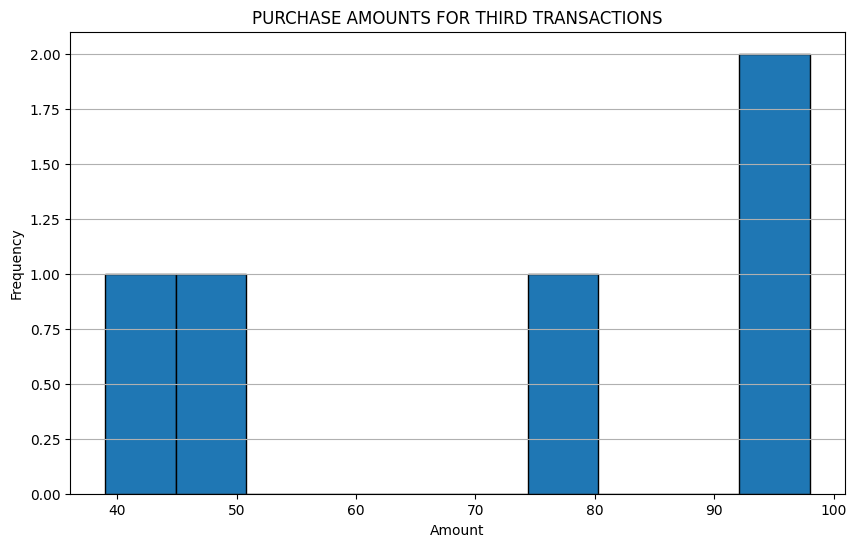

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.hist(third['amount'], bins=10, edgecolor='black')
plt.title('PURCHASE AMOUNTS FOR THIRD TRANSACTIONS')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.grid(axis='y')
plt.show()

# PART 3:STATISTICS

**AVERAGE AMOUNT FOR ALL TRANSACTIONS**

In [ ]:
avg_amount = df['amount'].mean()
print(f"Average Amount: {avg_amount:.2f}")

Average Amount: 54.85


**DISCOUNTED AMOUNT**

In [ ]:
df['discounted_amount'] = df['amount'] - 33
display(df)

,customer_id,transaction_id,amount,discounted_amount
0,1001,339473,89,56
1,1002,359433,5,-28
2,1003,43176,52,19
3,1004,27169,19,-14
4,1001,530588,4,-29
...,...,...,...,...
95,1001,900073,19,-14
96,1005,900074,58,25
97,1004,900075,65,32
98,1005,900076,43,10


**AVERAGE DISCOUNTED AMOUNT FOR 3rd TRANSACTIONS**

In [ ]:
discount_third = third_with_discount['discounted_amount'].mean()
print(f"Discounted amount: {discount_third:.2f}")

Discounted amount: 38.80


**PROBABILITY**

In [ ]:
total= len(df)
third = len(third_with_discount)
probability = third / total
print(f"Total number of transactions: {total}")
print(f"Third transactions: {third}")
print(f"Probability: {probability:.2f}")

Total number of transactions: 100
Third transactions: 5
Probability: 0.05


# PART 4:LINEAR ALGEBRA AND NUMPY

**AMOUNT AS A NUMPY ARRAY**

In [ ]:
import numpy as np
amountarray = df['amount'].to_numpy()
print(amountarray.reshape(10,10))

[[89  5 52 19  4 78 72 45 98 65]
 [94 42 43 19 55 50 78 92 30 91]
 [39 58 78 72 58 43 78  4 39 30]
 [52 94 43 43 39 94 50 78 30 52]
 [30 50 19 78 78 55 19 89 45 91]
 [45 92  5 72 19 55 52 19 78 98]
 [42  5 78 45 89 50 98 45 78 94]
 [89 43 43 39 55 55 78 78 91 89]
 [19 92 92 65 43 89 19  4 39 30]
 [ 5 92 50 43  5 19 58 65 43 45]]


**DISCOUNT VECTOR**

In [ ]:
df['transaction_order'] = df.sort_values('transaction_id').groupby('customer_id').cumcount()
df['discount_applied'] = df['transaction_order'].apply(lambda x: 0.33 if x == 2 else 0)
discount_vector = df['discount_applied'].to_numpy()
#display(df)
print("Discount Vector:")
print(discount_vector.reshape(10,10))

Discount Vector:
[[0.   0.   0.   0.   0.   0.33 0.   0.   0.33 0.  ]
 [0.33 0.   0.   0.   0.   0.33 0.   0.   0.   0.  ]
 [0.33 0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]]


**ELEMENT WISE MULTIPLICATION**

In [ ]:
discount_amount = amountarray * discount_vector
print(discount_amount.reshape(10,10))

[[ 0.    0.    0.    0.    0.   25.74  0.    0.   32.34  0.  ]
 [31.02  0.    0.    0.    0.   16.5   0.    0.    0.    0.  ]
 [12.87  0.    0.    0.    0.    0.    0.    0.    0.    0.  ]
 [ 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.  ]
 [ 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.  ]
 [ 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.  ]
 [ 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.  ]
 [ 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.  ]
 [ 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.  ]
 [ 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.  ]]


**TOTAL DISCOUNT ACROSS ALL CUSTOMERS**

In [ ]:
total_discount = np.dot(amountarray, discount_vector)
print(f"Dot product: {total_discount:.2f}")

Dot product: 118.47


**WEIGHTED SUM**

In [ ]:
weighted = df['transaction_order'].apply(lambda x: 0.33 if x == 2 else 0.67).to_numpy()
weighted_amounts = amountarray * weighted
print(weighted_amounts.reshape(10,10))

[[59.63  3.35 34.84 12.73  2.68 25.74 48.24 30.15 32.34 43.55]
 [31.02 28.14 28.81 12.73 36.85 16.5  52.26 61.64 20.1  60.97]
 [12.87 38.86 52.26 48.24 38.86 28.81 52.26  2.68 26.13 20.1 ]
 [34.84 62.98 28.81 28.81 26.13 62.98 33.5  52.26 20.1  34.84]
 [20.1  33.5  12.73 52.26 52.26 36.85 12.73 59.63 30.15 60.97]
 [30.15 61.64  3.35 48.24 12.73 36.85 34.84 12.73 52.26 65.66]
 [28.14  3.35 52.26 30.15 59.63 33.5  65.66 30.15 52.26 62.98]
 [59.63 28.81 28.81 26.13 36.85 36.85 52.26 52.26 60.97 59.63]
 [12.73 61.64 61.64 43.55 28.81 59.63 12.73  2.68 26.13 20.1 ]
 [ 3.35 61.64 33.5  28.81  3.35 12.73 38.86 43.55 28.81 30.15]]


# PART 5:CALCULUS

In [ ]:
from sympy import symbols, diff
amount, discount_rate = symbols('amount discount_rate')
discount_applied = amount * (1 - discount_rate)
derivative = diff(discount_applied, amount)

print(f"The derivative of discount applied: {derivative}")

The derivative of discount applied: 1 - discount_rate


# PART 6:FEATURE ENGINEERING

**NEW COLUMN TRANSACTION RANK**

In [ ]:
df['transaction_order'] = df.sort_values('transaction_id').groupby('customer_id').cumcount()
df['transaction_rank'] = df['transaction_order'] + 1 # Adding 1 to make it 1based rank
display(df.head())

,customer_id,transaction_id,amount,transaction_order,transaction_rank
0,1001,339473,89,1,2
1,1002,359433,5,1,2
2,1003,43176,52,0,1
3,1004,27169,19,0,1
4,1001,530588,4,4,5


**NEW COULUMS:DISCOUNT_APPLIED, DISCOUNTED_AMOUNT, SAVINGS**

In [ ]:
df['Savings'] = df['amount'] - df['discount_applied']
display(df)

,customer_id,transaction_id,amount,discounted_amount,transaction_order,discount_applied,transaction_rank,discount_amount,Savings
0,1001,339473,89,0,1,0.0,2,0,89.0
1,1002,359433,5,0,1,0.0,2,0,5.0
2,1003,43176,52,0,0,0.0,1,0,52.0
3,1004,27169,19,0,0,0.0,1,0,19.0
4,1001,530588,4,0,4,0.0,5,0,4.0
...,...,...,...,...,...,...,...,...,...
95,1001,900073,19,0,21,0.0,22,0,19.0
96,1005,900074,58,0,24,0.0,25,0,58.0
97,1004,900075,65,0,19,0.0,20,0,65.0
98,1005,900076,43,0,25,0.0,26,0,43.0


# PART 7:SQL

In [ ]:
discount_rows = df[df['discount_amount'] == 1]
display(discount_rows)

,customer_id,transaction_id,amount,discounted_amount,transaction_order,discount_applied,transaction_rank,discount_amount,Savings
5,1004,528902,78,1,2,0.33,3,1,77.67
8,1005,500607,98,1,2,0.33,3,1,97.67
10,1001,374711,94,1,2,0.33,3,1,93.67
15,1002,415562,50,1,2,0.33,3,1,49.67
20,1003,102487,39,1,2,0.33,3,1,38.67


In [ ]:
display(discounted_rows[['customer_id', 'transaction_id', 'amount', 'discount_applied']].sort_values('customer_id', ascending=True))

,customer_id,transaction_id,amount,discount_applied
10,1001,374711,94,0.33
15,1002,415562,50,0.33
20,1003,102487,39,0.33
5,1004,528902,78,0.33
8,1005,500607,98,0.33


# PART 8:INSIGHTS

In [ ]:
largestdiscount = df.groupby('customer_id')['discount_amount'].sum()
customerlargest_discount = largestdiscount.idxmax()
print(f"Largest Discount: {customerlargest_discount}")


Largest Discount: 1001


In [ ]:
print(f"Total discounted amount: {total_discount:.2f}")

Total discounted amount: 118.47


In [ ]:
total_savings= df.groupby('customer_id')['Savings'].sum()
average_saving = total_savings.mean()
print(f"The average saving per customer: {average_saving:.2f}")

The average saving per customer: 1096.67


In [ ]:
total = df.groupby('customer_id')['Savings'].sum()
spent_most = total.idxmax()
spent_amount = total.max()
print(f"The customer who spent the most : {spent_most}")
print(f"The total amount: {spent_amount:.2f}")

The customer who spent the most : 1005
The total amount: 1694.67
